<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_train[0].shape

(28, 28)

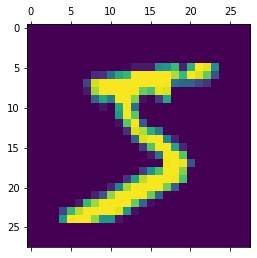

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h3 style='color:purple'>Using ANN for classification</h3>

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1250 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0336 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9779


[0.07347696274518967, 0.9779000282287598]

In [14]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [16]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1645 - accuracy: 0.9524
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0571 - accuracy: 0.9824
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0383 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0184 - accuracy: 0.9940


In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0462 - accuracy: 0.9860


[0.04616343602538109, 0.9860000014305115]